<a href="https://colab.research.google.com/github/ISHITA79/MINIPROJECTS/blob/main/DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [3]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving valid.csv to valid.csv


In [46]:
Test_file = pd.read_csv('Test.csv')
Train_file = pd.read_csv('train.csv')
Valid_file = pd.read_csv('valid.csv')

In [33]:
def data_obs():
  print("training dataset size:")
  print(Train_file.shape)
  print(Train_file.head(10))
     
   

In [18]:
print(Test_file.shape)
print(Test_file.head(10))
    

(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   True
4  When asked by a reporter whether hes at the ce...  False
5  Over the past five years the federal governmen...   True
6  Says that Tennessee law requires that schools ...   True
7  Says Vice President Joe Biden "admits that the...  False
8  Donald Trump is against marriage equality. He ...   True
9  We know that more than half of Hillary Clinton...  False


In [12]:
print(Valid_file.shape)
print(Valid_file.head(10))

(2571, 2)
                                           Statement  Label
0  We have less Americans working now than in the...  FALSE
1  When Obama was sworn into office, he DID NOT u...  FALSE
2  Says Having organizations parading as being so...  FALSE
3     Says nearly half of Oregons children are poor.   TRUE
4  On attacks by Republicans that various program...   TRUE
5  Says when armed civilians stop mass shootings ...  FALSE
6  Says Tennessee is providing millions of dollar...   TRUE
7  The health care reform plan would set limits s...  FALSE
8  Says Donald Trump started his career back in 1...   TRUE
9  Bill White has a long history of trying to lim...   TRUE


In [29]:
def create_distribution(dataFile):
  return sb.countplot(x='Label', data=dataFile, palette='hls')

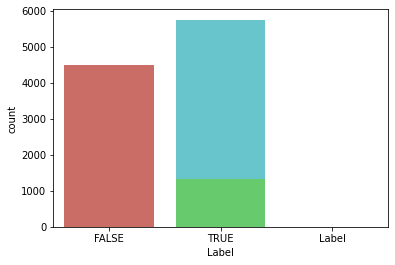

In [16]:
create_distribution(Train_file)
create_distribution(Test_file)
create_distribution(Valid_file)


In [32]:
def data_qualityCheck():
 print("Checking data qualitites...")
 Train_file.isnull().sum()
 Train_file.info()
 Test_file.isnull().sum()
 Test_file.info()
 Valid_file.isnull().sum()
 Valid_file.info()
 print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB
check finished.


In [31]:
 def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [36]:
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed


In [37]:
def create_unigram(words):
    assert type(words) == list
    return words

In [38]:
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst


In [39]:
porter = PorterStemmer()

In [40]:
def tokenizer(text):
    return text.split()

In [41]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]